In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#function to read in csv and return a Pandas DataFrame
def csv_pd(file):
    return pd.read_csv(file)

In [3]:
#assign variable names to dataframes
child = csv_pd('Autism-Child-Data.arff.csv')
ado = csv_pd('Autism-Adolescent-Data.arff.csv')
adult = csv_pd('Autism-Adult-Data.arff.csv')

### Inspecting and Cleaning Data 

In [4]:
#inspect child dataframe
child.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [5]:
#inspect child dataframe
ado.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,1,1,1,1,1,1,...,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,2,0,0,0,0,0,0,0,0,1,...,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,3,0,0,0,0,0,0,0,0,1,...,f,?,no,no,AmericanSamoa,no,2,12-16 years,?,NO
3,4,0,1,1,1,1,1,0,1,1,...,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,5,1,1,1,1,1,1,1,0,0,...,f,?,no,no,Albania,no,7,12-16 years,?,YES


In [6]:
#inspect adult dataframe
adult.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [7]:
#check for missing data or NaN entries
child.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
id                 292 non-null int64
A1_Score           292 non-null int64
A2_Score           292 non-null int64
A3_Score           292 non-null int64
A4_Score           292 non-null int64
A5_Score           292 non-null int64
A6_Score           292 non-null int64
A7_Score           292 non-null int64
A8_Score           292 non-null int64
A9_Score           292 non-null int64
A10_Score          292 non-null int64
age                292 non-null object
gender             292 non-null object
ethnicity          292 non-null object
jundice            292 non-null object
austim             292 non-null object
contry_of_res      292 non-null object
used_app_before    292 non-null object
result             292 non-null int64
age_desc           292 non-null object
relation           292 non-null object
Class/ASD          292 non-null object
dtypes: int64(12), object(10)
memory usage: 50.3+

In [8]:
#check for missing data or NaN entries
ado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 22 columns):
id                 104 non-null int64
A1_Score           104 non-null int64
A2_Score           104 non-null int64
A3_Score           104 non-null int64
A4_Score           104 non-null int64
A5_Score           104 non-null int64
A6_Score           104 non-null int64
A7_Score           104 non-null int64
A8_Score           104 non-null int64
A9_Score           104 non-null int64
A10_Score          104 non-null int64
age                104 non-null int64
gender             104 non-null object
ethnicity          104 non-null object
jundice            104 non-null object
austim             104 non-null object
contry_of_res      104 non-null object
used_app_before    104 non-null object
result             104 non-null int64
age_desc           104 non-null object
relation           104 non-null object
Class/ASD          104 non-null object
dtypes: int64(13), object(9)
memory usage: 18.0+ K

In [9]:
#check for missing data or NaN entries
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null object
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: int64(11), object(10)
memory usage: 115.6+ KB


In [10]:
#check for NaN the easy way
print(child.isnull().sum().sum())
print(ado.isnull().sum().sum())
print(adult.isnull().sum().sum())


0
0
0


In [11]:
#get column names, verify all three dfs have the same column labels and in the same order
print(child.columns)
print(ado.columns)
print(adult.columns)

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [12]:
#change range of id column to reflect larger df size
ado.id = ado.id + len(child.id)

#insert id column to adult df, which did not have one
adult.insert(0, 'id', range(len(ado) + len(child), len(ado) + len(child) + len(adult)))

In [13]:
#merge dataframes together
aut = pd.concat([child, ado, adult], ignore_index=True)

In [14]:
#rename columns to correct misspellings
aut.rename(columns={'jundice':'jaundice', 'austim':'family_autism', 
                      'contry_of_res':'country_of_res', 'Class/ASD':'ASD'}, inplace=True)

In [15]:
#check age description for unexpected values
aut['age_desc'].value_counts()

'18 and more'    704
4-11 years       292
12-16 years       97
12-15 years        7
Name: age_desc, dtype: int64

In [16]:
#remove and replace special characters and typos for consistency
aut['age_desc'] = aut['age_desc'].str.replace("12-15", "12-16")
aut['age_desc'] = aut['age_desc'].str.replace("\'18 and more\'", "18 and more years")

In [17]:
#check age description for unexpected values
aut.age.value_counts()

4      92
21     49
20     46
5      45
6      39
22     37
23     37
19     35
24     34
27     31
16     31
18     31
30     30
26     28
7      27
29     27
25     27
11     26
12     25
28     24
31     21
8      21
9      20
17     18
10     18
15     18
32     18
37     17
35     17
13     16
33     16
40     16
42     15
14     14
36     13
38     12
34     12
43     11
44     10
47      8
39      7
46      6
55      6
53      6
?       6
50      5
52      5
48      4
45      4
41      3
49      3
61      2
58      2
54      2
56      2
59      1
383     1
60      1
51      1
64      1
Name: age, dtype: int64

In [18]:
#an age was entered as 383 years old
aut.loc[aut['age'] == 383]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,family_autism,country_of_res,used_app_before,result,age_desc,relation,ASD


In [19]:
#find where the missing ages are
unknown_age = aut.loc[aut['age'] == '?']
unknown_age

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,family_autism,country_of_res,used_app_before,result,age_desc,relation,ASD
32,33,1,0,0,1,0,1,1,1,1,...,m,?,no,no,Egypt,no,7,4-11 years,?,YES
65,66,0,0,1,0,0,0,0,0,0,...,m,Middle Eastern,no,no,Jordan,no,1,4-11 years,Parent,NO
126,127,1,1,1,1,0,1,0,1,0,...,m,?,yes,no,Jordan,no,7,4-11 years,?,YES
138,139,0,1,1,0,1,1,1,1,0,...,m,?,yes,no,Qatar,yes,6,4-11 years,?,NO
458,458,0,0,0,0,0,0,0,0,0,...,m,?,no,no,'Saudi Arabia',no,0,18 and more years,?,NO
487,487,0,1,0,0,1,0,1,0,0,...,f,?,no,no,Jordan,no,4,18 and more years,?,NO


In [20]:
med = aut[['age', 'age_desc']]
med

,age,age_desc
0,6,4-11 years
1,6,4-11 years
2,6,4-11 years
3,5,4-11 years
4,5,4-11 years
...,...,...
1095,25,18 and more years
1096,34,18 and more years
1097,24,18 and more years
1098,35,18 and more years


In [21]:
#replace missing data with NaN
med = med.replace("?", np.NaN)

In [22]:
#convert series to numeric
med.age = pd.to_numeric(med.age)

In [23]:
#calculate median values for each age group, excluding missing values
medians = med.age.groupby(med['age_desc']).median()
medians

age_desc
12-16 years          14.0
18 and more years    27.0
4-11 years            6.0
Name: age, dtype: float64

In [24]:
#replace nan values with median values for corresponding age range
aut.age[32] = medians[2]
aut.age[65] = medians[2]
aut.age[126] = medians[2]
aut.age[138] = medians[2]
aut.age[458] = medians[1]
aut.age[487] = medians[1]
aut.age[448] = medians[1]
aut.age = pd.to_numeric(aut.age)

/Users/triffid/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/triffid/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/triffid/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [25]:
#check gender for unexpected values
aut.gender.value_counts()

m    625
f    475
Name: gender, dtype: int64

In [26]:
#check ethnicity for unexpected values
aut.ethnicity.value_counts()

White-European       381
Asian                185
?                    144
'Middle Eastern '     92
Black                 65
Others                56
'South Asian'         36
Middle Eastern        36
Latino                33
Hispanic              25
South Asian           24
Pasifika              14
Turkish                8
others                 1
Name: ethnicity, dtype: int64

In [27]:
#remove and replace special characters
aut['ethnicity'] = aut.ethnicity.str.replace("\?", "Unknown")
aut['ethnicity'] = aut.ethnicity.str.replace("\'", "")
aut['ethnicity'] = aut.ethnicity.str.replace(" \'", "")
aut['ethnicity'] = aut.ethnicity.str.replace("others", "Others")

In [28]:
#check jaundice for unexpected values
aut.jaundice.value_counts()

no     935
yes    165
Name: jaundice, dtype: int64

In [29]:
#check family history for unexpected values
aut['family_autism'].value_counts()

no     946
yes    154
Name: family_autism, dtype: int64

In [30]:
#check country of residence for unexpected values
aut['country_of_res'].value_counts()

India                     130
'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
United Kingdom             78
                         ... 
Kuwait                      1
Ecuador                     1
U.S. Outlying Islands       1
Bulgaria                    1
'Czech Republic'            1
Name: country_of_res, Length: 97, dtype: int64

In [31]:
#remove special characters
aut['country_of_res'] = aut['country_of_res'].str.replace("\'", "")
aut['country_of_res'].value_counts()

United States            167
United Kingdom           155
India                    130
New Zealand               95
United Arab Emirates      90
                        ... 
Kuwait                     1
Isle of Man                1
Serbia                     1
U.S. Outlying Islands      1
Sierra Leone               1
Name: country_of_res, Length: 89, dtype: int64

In [32]:
#check prior app use for unexpected values
aut['used_app_before'].value_counts()

no     1073
yes      27
Name: used_app_before, dtype: int64

In [33]:
#check result for unexpected values.  This also checks the score columns for any unexpected values.
aut['result'].value_counts()

4     174
3     136
5     129
6     126
8     121
7     118
9      98
2      85
10     56
1      42
0      15
Name: result, dtype: int64

In [34]:
#check relation description for unexpected values
aut['relation'].value_counts()

Self                          571
Parent                        300
?                             144
Relative                       53
Health care professional       19
Others                          8
'Health care professional'      4
self                            1
Name: relation, dtype: int64

In [35]:
#remove and replace special characters
aut['relation'] = aut.relation.str.replace("\?", "Unknown")
aut['relation'] = aut.relation.str.replace("\'", "")
aut['relation'] = aut.relation.str.replace("self", "Self")

aut['relation'].value_counts()

Self                        572
Parent                      300
Unknown                     144
Relative                     53
Health care professional     23
Others                        8
Name: relation, dtype: int64

In [36]:
#check age description for unexpected values
aut['ASD'].value_counts()

NO     707
YES    393
Name: ASD, dtype: int64

In [37]:
#replace values
aut['ASD'] = aut['ASD'].str.replace("NO", "no")
aut['ASD'] = aut['ASD'].str.replace("YES", "yes")

### Data Visualizations

In [40]:
from scipy import stats

In [41]:
#import Seaborn
import seaborn as sns

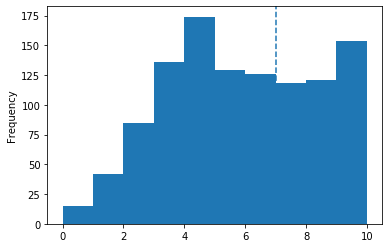

In [42]:
#frequency distribution of overall autism scores, not grouped
_ = aut.result.plot(kind='hist')
_ = plt.axvline(x=7, linestyle='dashed')
_ = plt.show()


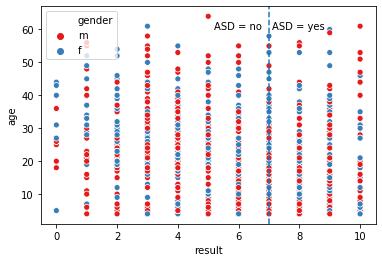

In [43]:
# scatterplot of age vs result
_ = sns.scatterplot(x="result", y="age", data=aut, hue="gender", palette="Set1")
_ = _.axvline(7, ls='--')
_ = plt.text(7.1,60, "ASD = yes")
_ = plt.text(5.2,60, "ASD = no")

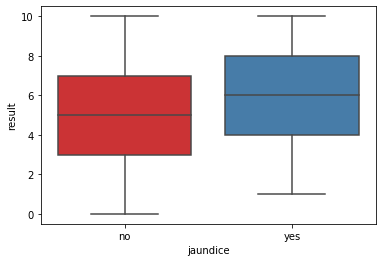

In [44]:
# Grouped boxplot by jaundice
_ = sns.boxplot(x="jaundice", y="result", data=aut, palette="Set1")

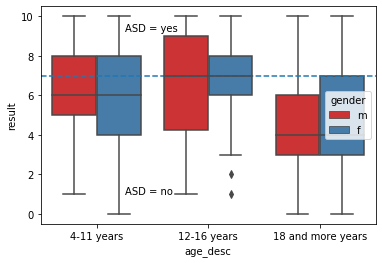

In [45]:
# Grouped boxplot by age category and gender
_ = sns.boxplot(x="age_desc", y="result", hue="gender", data=aut, palette="Set1")
_ = plt.axhline(7, ls='--')
_ = plt.text(0.25,9.25, "ASD = yes")
_ = plt.text(0.25,1, "ASD = no")

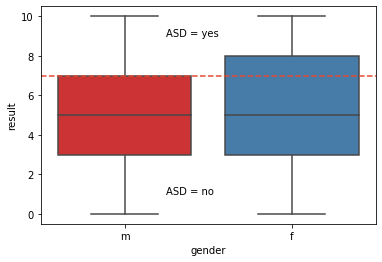

In [46]:
# Grouped boxplot by jaundice
_ = sns.boxplot(x="gender", y="result", data=aut, palette="Set1")
_ = plt.style.use('ggplot')
_ = plt.axhline(7, ls='--')
_ = plt.text(0.25,9, "ASD = yes")
_ = plt.text(0.25,1, "ASD = no")

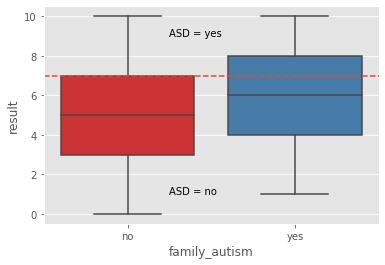

In [47]:
# Grouped boxplot by history of autism in the family
_ = sns.boxplot(x="family_autism", y="result", data=aut, palette="Set1")
_ = plt.axhline(7, ls='--')
_ = plt.text(0.25,9, "ASD = yes")
_ = plt.text(0.25,1, "ASD = no")

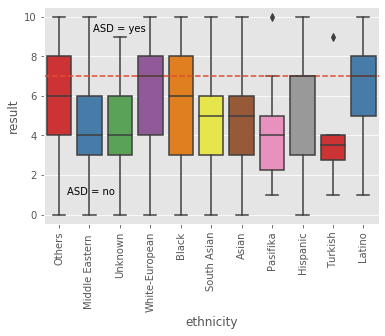

In [48]:
# Grouped boxplot by ethnicity
_ = sns.boxplot(x="ethnicity", y="result", data=aut, palette="Set1")
_ = _.set_xticklabels(_.get_xticklabels(),rotation=90)
_ = plt.axhline(7, ls='--')
_ = plt.text(1.1,9.25, "ASD = yes")
_ = plt.text(0.25,1, "ASD = no")